In [219]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from statsmodels.api import qqplot
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [220]:
df = pd.read_csv('housing.csv')

In [221]:
df.shape

(489, 4)

In [222]:
df['MEDV']= df['MEDV'].astype(int)

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    int32  
dtypes: float64(3), int32(1)
memory usage: 13.5 KB


In [224]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [225]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


<Axes: ylabel='MEDV'>

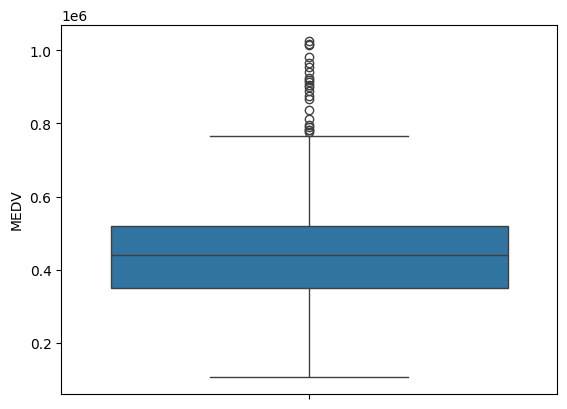

In [226]:
sns.boxplot(df['MEDV'])

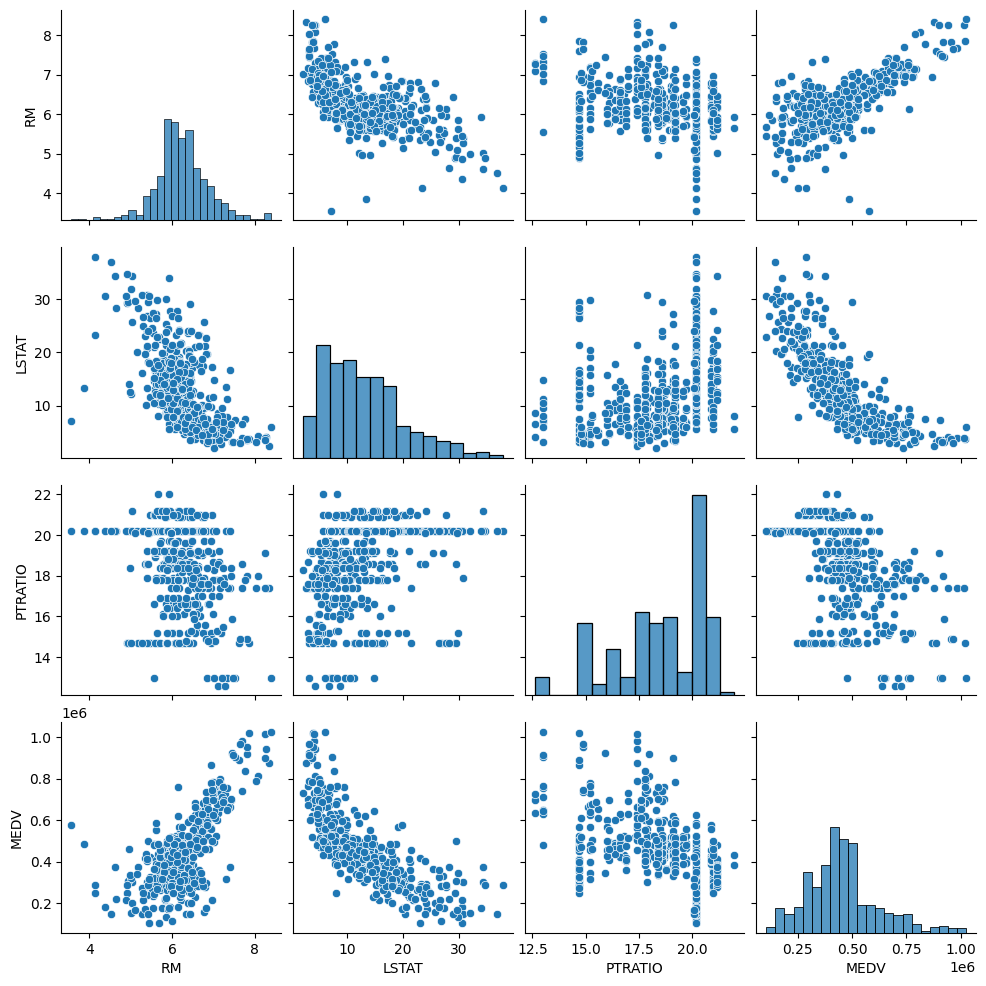

In [227]:
sns.pairplot(data=df)

In [228]:
train, test =train_test_split(df, test_size=0.3, random_state=45, shuffle=True)

In [229]:
model_result = {}
X_train, y_train = train.drop('MEDV', axis='columns'), train['MEDV']

In [230]:
for feature in X_train.columns:
  
  Ridgereg = Pipeline(
      steps=[("numerical_imputer", SimpleImputer(strategy='mean')),
           ("scaler", StandardScaler()),
           ("sgd", Ridge())])

  Ridgereg.fit(X_train[feature].values.reshape(-1,1), y_train)

  model_result[feature] = Ridgereg

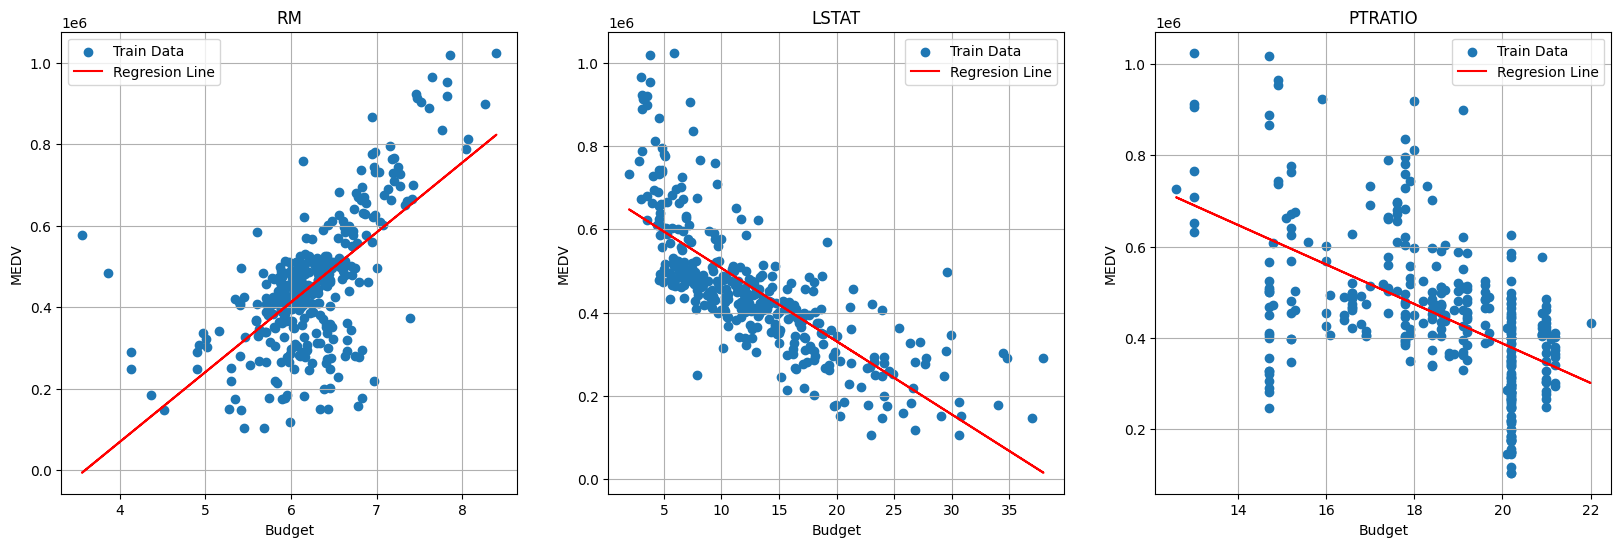

In [231]:
fig, axes = plt.subplots(1, len(X_train.columns), figsize=(20, 6))

for i, feature in enumerate(X_train.columns):
  X_values = X_train[feature].values.reshape(-1, 1)
  y_values = y_train.values.reshape(-1, 1)

  axes[i].scatter(train[feature], y_values, label='Train Data')
  model = model_result[feature]
  predicted = model.predict(X_values)

  axes[i].plot(train[feature], predicted, color='red', label='Regresion Line')
  axes[i].set_title(feature)
  axes[i].set_xlabel('Budget')
  axes[i].set_ylabel('MEDV')
  axes[i].grid()
  axes[i].legend()

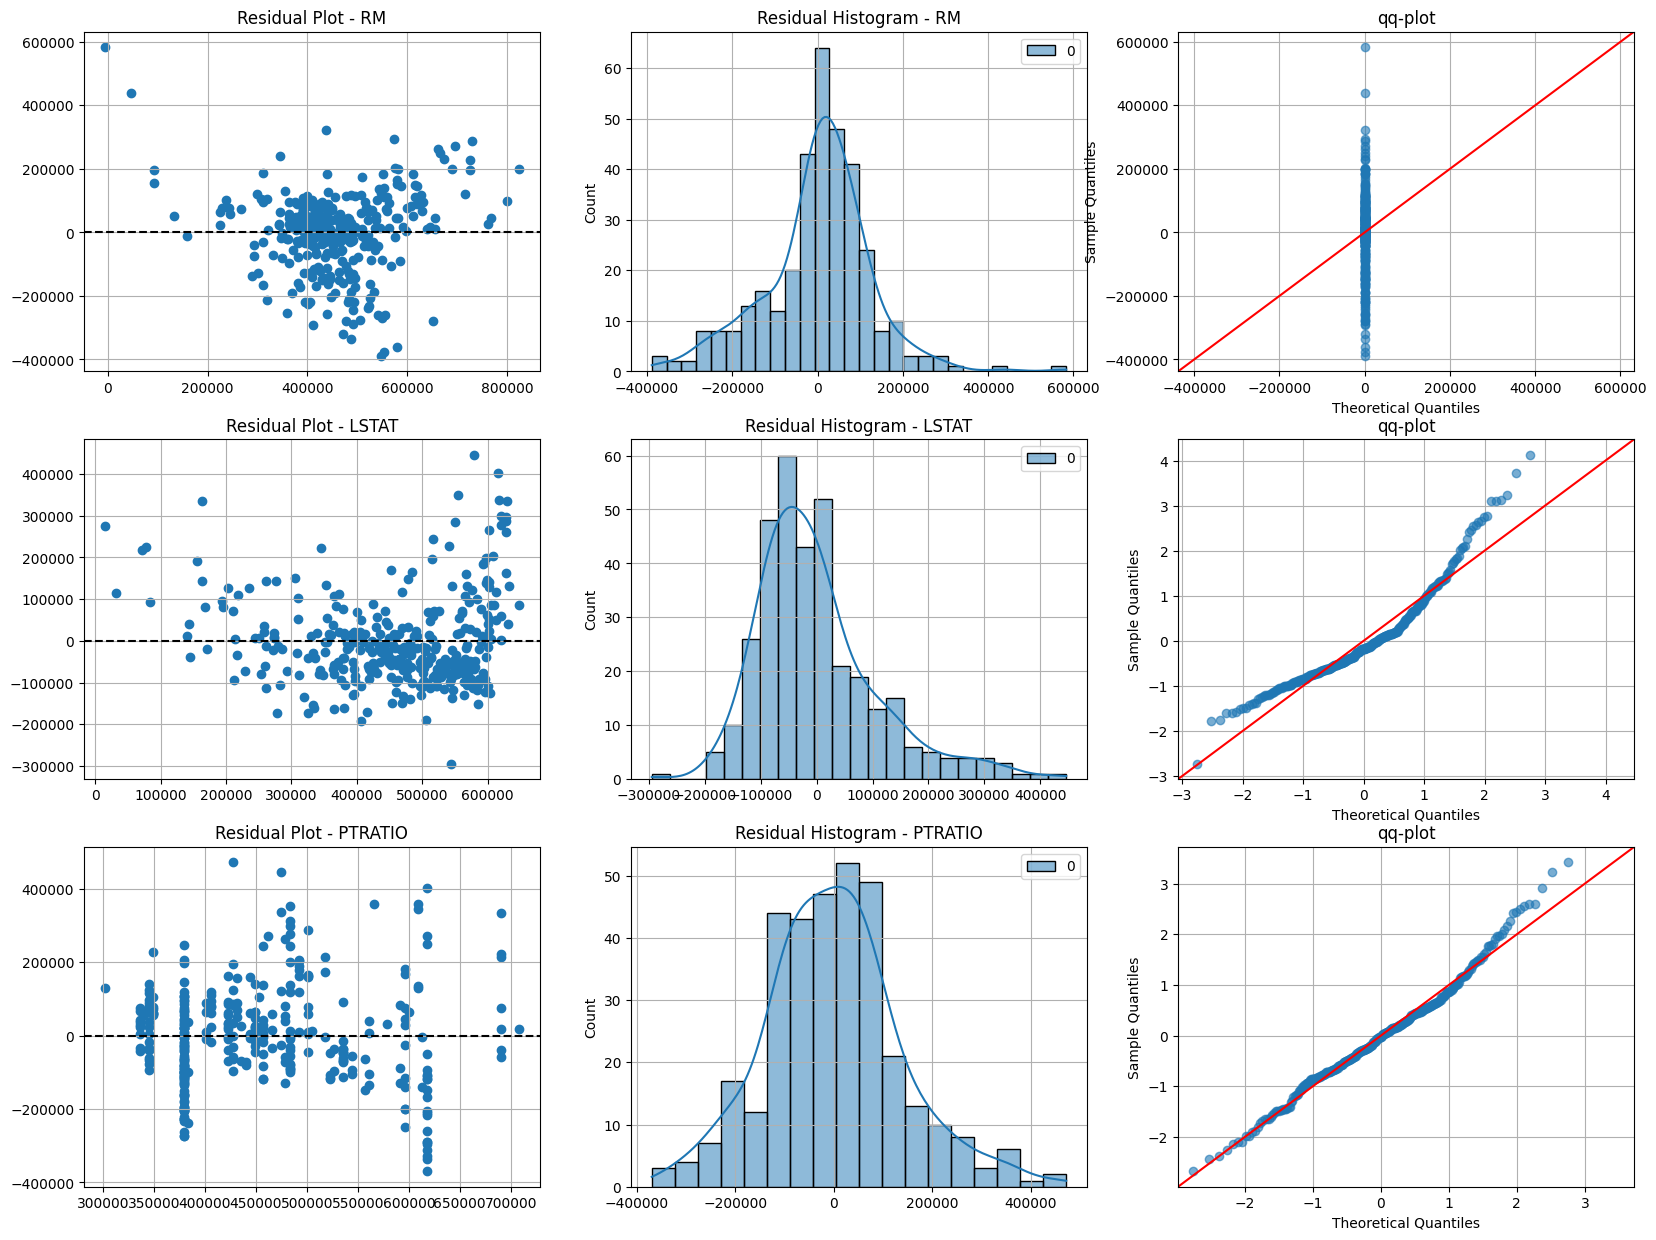

In [232]:


selected = ['RM','LSTAT','PTRATIO']
residuals_train = {}
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
for i, feature in enumerate(selected):
  X_values = X_train[feature].values.reshape(-1,1)
  y_values = y_train.values.reshape(-1, 1)
  model = model_result[feature]
  y_pred = model.predict(X_values)
  residual =  y_values - y_pred.reshape(-1,1)
  residuals_train[feature] = residual
  axes[i][0].axhline(y=0, color='black', linestyle='--')
  axes[i][0].scatter(y_pred, residual)
  axes[i][0].set_title('Residual Plot - ' +  feature)
  sns.histplot(residual, kde=True, ax=axes[i][1])
  axes[i][1].set_title('Residual Histogram - ' +  feature)
  qqplot(np.sort(residual.flatten()), fit=True, line="45", ax=axes[i][2], alpha= 0.6)
  axes[i][2].set_title('qq-plot')
  axes[i][0].grid()
  axes[i][1].grid()
  axes[i][2].grid()



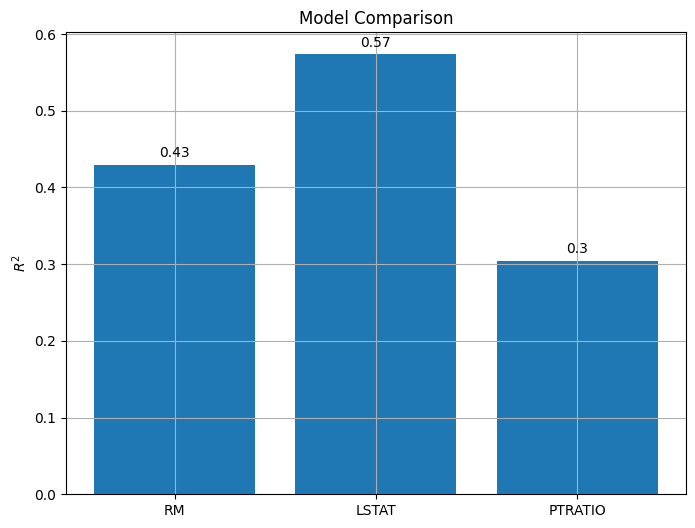

In [233]:
scores = []
for i, feature in enumerate(X_train.columns):
  X_values = X_train.iloc[:,i].values.reshape(-1, 1)
  y_values = y_train.values.reshape(-1, 1)
  model = model_result[feature]
  scores.append(model.score(X_values, y_values))

plt.figure(figsize=(8,6))
plt.bar(X_train.columns, scores)
plt.ylabel('$R^2$')
plt.title('Model Comparison')
plt.grid()

def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 0.01, round(y[i],2), ha = 'center')

add_labels(X_train.columns, scores)

In [234]:
from itertools import combinations

all_combinatios = []
model_final = {}
features = ['RM','LSTAT','PTRATIO']
final_scores = []
for i in range(1, 4):
  all_combinatios += list(combinations(features, i))

all_combinatios = [list(combination) for combination in all_combinatios]
all_combinatios

[['RM'],
 ['LSTAT'],
 ['PTRATIO'],
 ['RM', 'LSTAT'],
 ['RM', 'PTRATIO'],
 ['LSTAT', 'PTRATIO'],
 ['RM', 'LSTAT', 'PTRATIO']]

In [235]:
for combination in all_combinatios:
   sgd = Ridge()
   X_values = X_train[combination].values.reshape(-1, len(combination))
   y_values = y_train.ravel()

   Ridgereg = Pipeline(
      steps=[("numerical_imputer", SimpleImputer(strategy='mean')),
           ("scaler", StandardScaler()),
           ("sgd", Ridge())])

   Ridgereg.fit(X_values, y_values)
   y_pred = Ridgereg.predict(X_values)
   model_final[combination.__repr__()] = Ridgereg
   final_scores.append(Ridgereg.score(X_values, y_values))

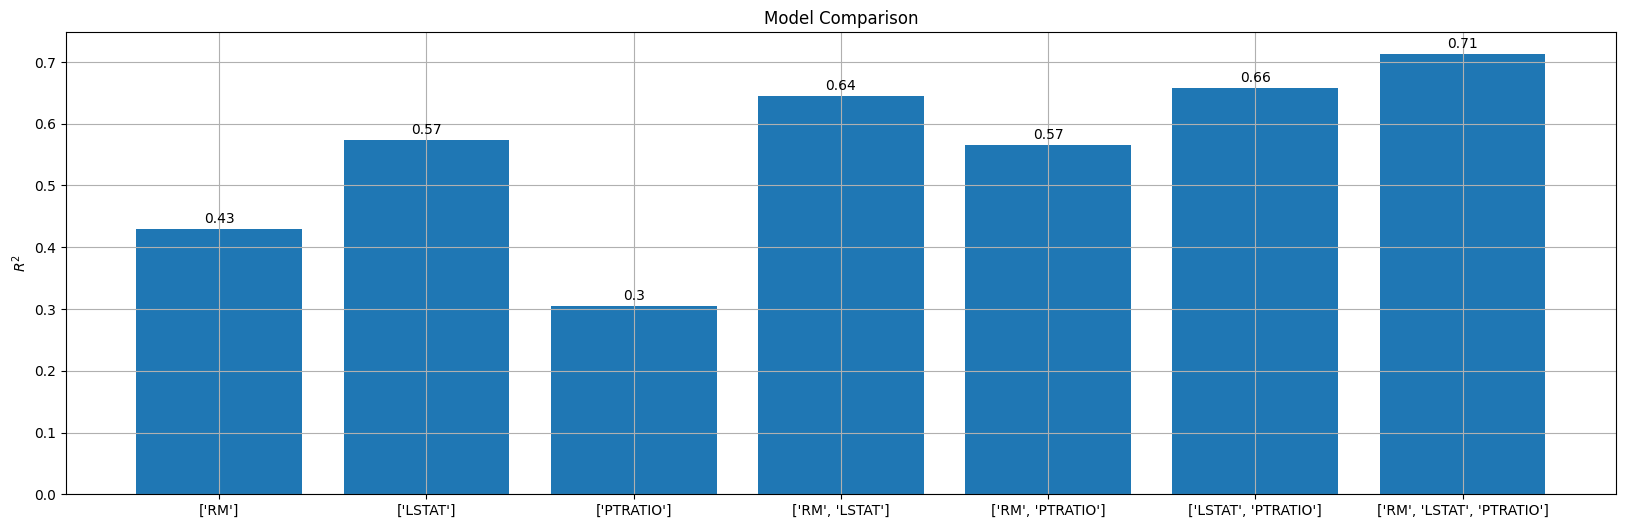

In [236]:
plt.figure(figsize=(20,6))
plt.bar(model_final.keys(), final_scores)
plt.ylabel('$R^2$')
plt.title('Model Comparison')
plt.grid()

def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 0.01, round(y[i],2), ha = 'center')

add_labels(model_final.keys(), final_scores)

In [237]:
test_scores = []

X_test, y_test = test.drop('MEDV', axis='columns'), test['MEDV']

for combination in all_combinatios:

  X_values = X_test[combination].values.reshape(-1,len(combination))
  y_values = y_test.values.reshape(-1, 1)

  model = model_final[combination.__repr__()]
  test_scores.append(model.score(X_values, y_values))

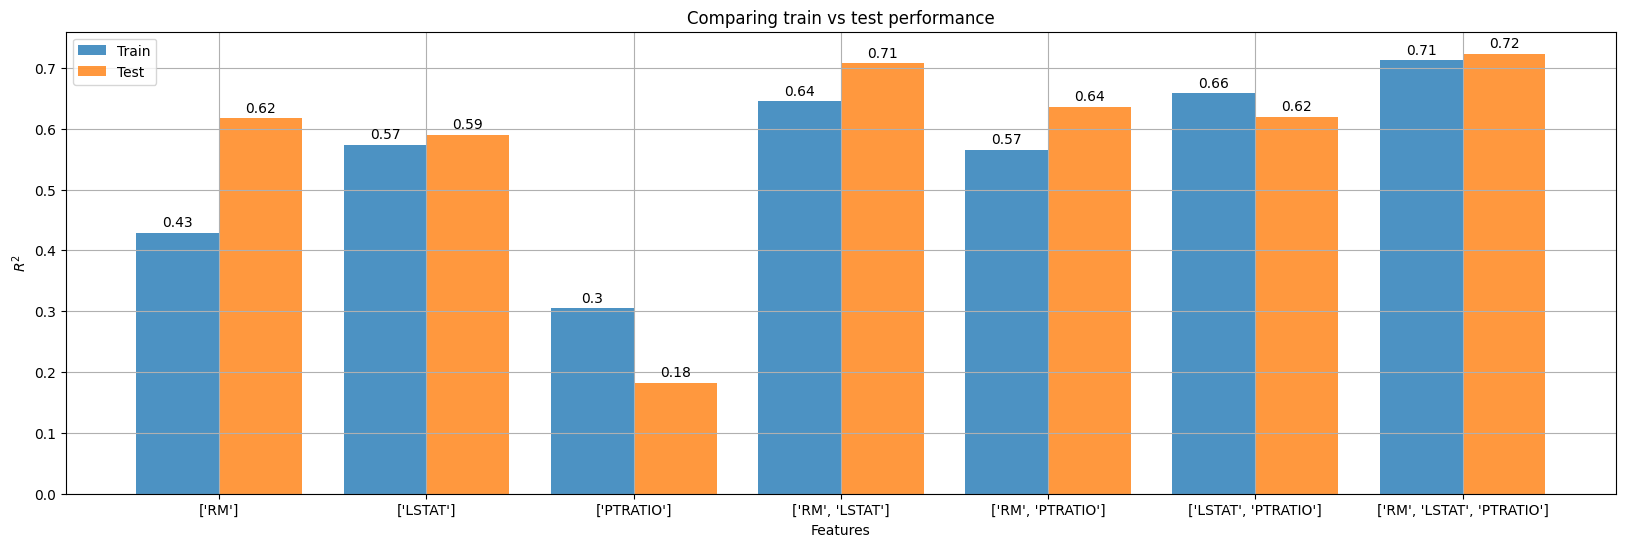

In [238]:
plt.figure(figsize=(20,6))

X_axis = np.arange(len(model_final.keys()))

plt.bar(X_axis - 0.2, final_scores, 0.4, label = 'Train', alpha=0.8)
plt.bar(X_axis + 0.2, test_scores, 0.4, label = 'Test', alpha=0.8)

plt.ylabel('$R^2$')
plt.title('Test Comparison')
plt.grid()
plt.xticks(X_axis, model_final.keys())
plt.xlabel("Features")
plt.title("Comparing train vs test performance")
plt.legend()

def addlabels(x, y, val):
    for i in range(len(x)):
        plt.text(i + val , y[i] + 0.01, round(y[i],2), ha = 'center')

addlabels(model_final.keys(), final_scores, - 0.2)
addlabels(model_final.keys(), test_scores, + 0.2)
plt.show()

C:\Users\juano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\graphics\gofplots.py:1043: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\juano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\graphics\gofplots.py:1043: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\juano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\graphics\gofplots.py:1043: UserWarning: color is redundantly defined by the 'colo

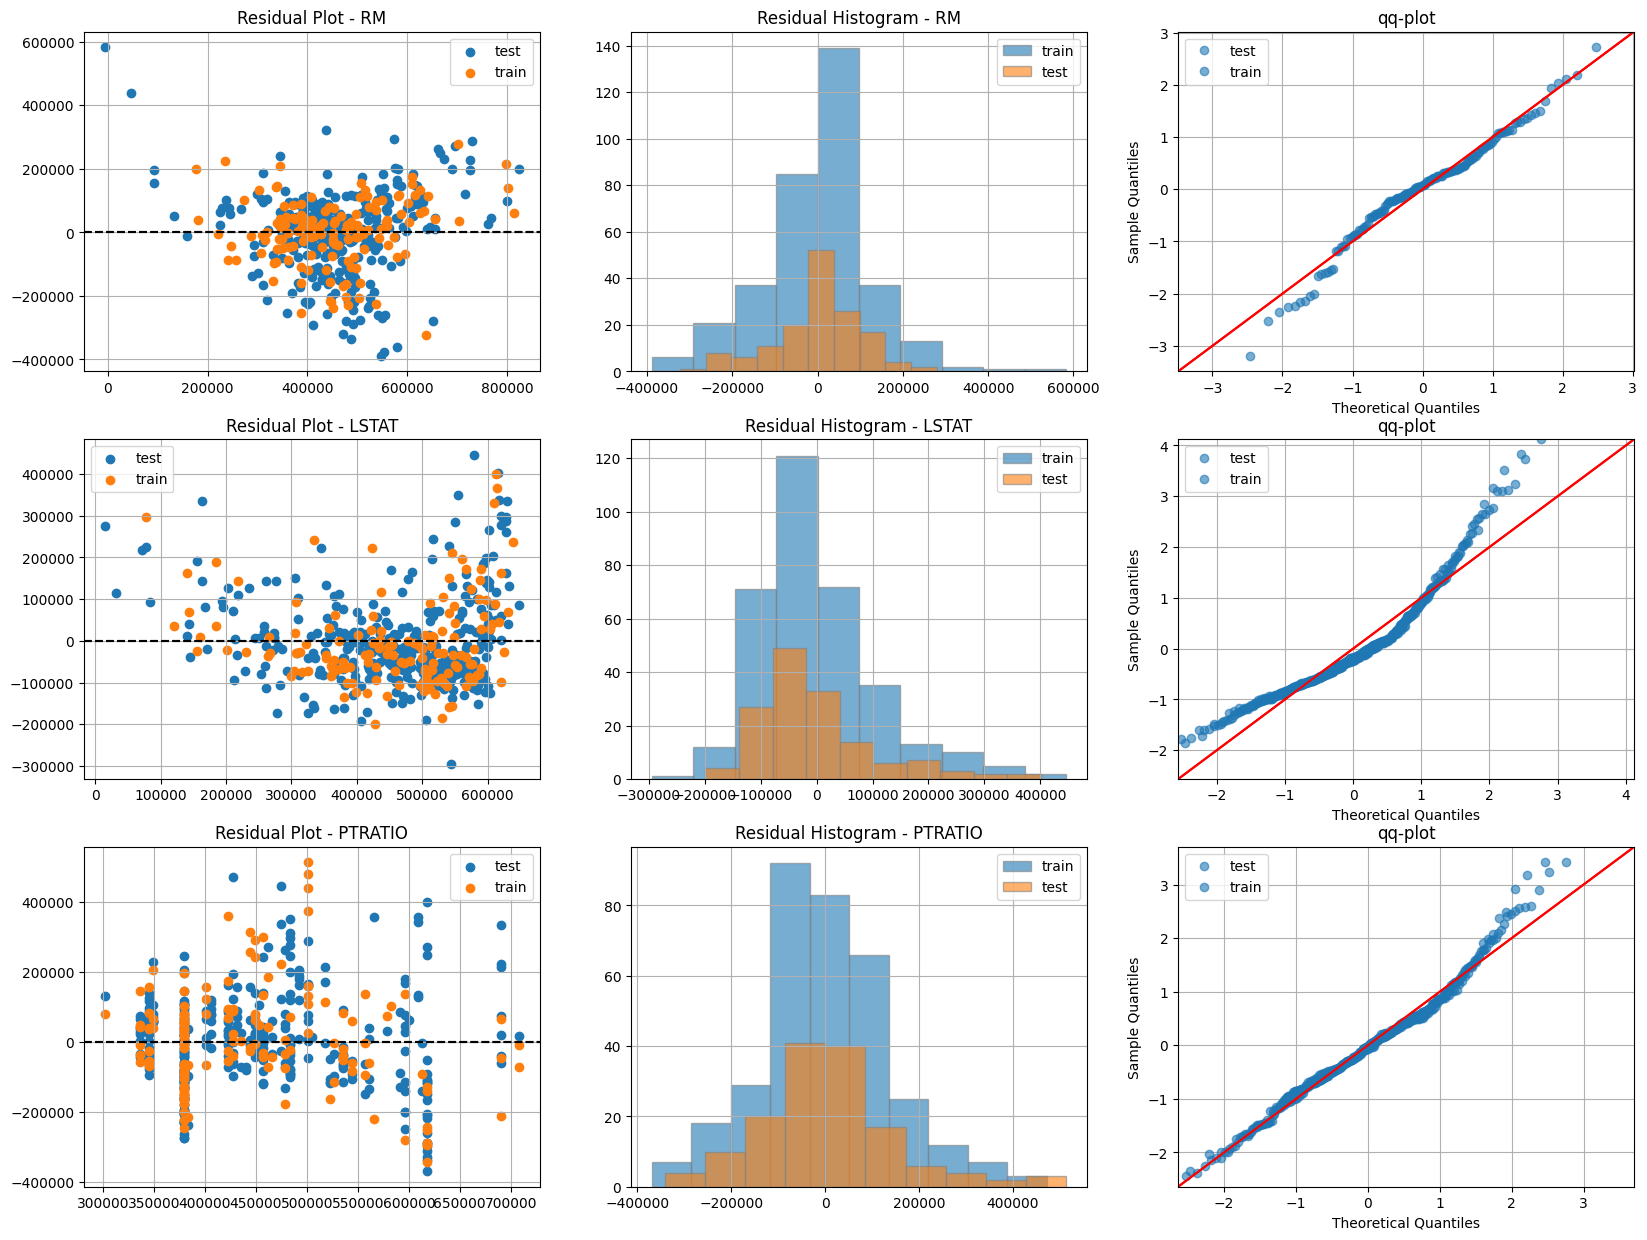

In [239]:
selected = ['RM','LSTAT','PTRATIO']
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

for i, combination in enumerate(selected):

  X_train_values = X_train[combination].values.reshape(-1,1)
  residual_ = residuals_train[combination]

  X_test_values = X_test[combination].values.reshape(-1,1)
  y_values = y_test.values.reshape(-1, 1)
  model = model_result[combination]
  y_pred = model.predict(X_test_values)
  y_pred_ = model.predict(X_train_values)
  residual = y_values - y_pred.reshape(-1,1)
  axes[i][0].axhline(y=0, color='black', linestyle='--')
  axes[i][0].scatter(y_pred_, residual_, label='test')
  axes[i][0].set_title('Residual Plot - ' +  feature)

  axes[i][0].axhline(y=0, color='black', linestyle='--')
  axes[i][0].scatter(y_pred, residual, label='train')
  axes[i][0].set_title('Residual Plot - ' +  combination)
  axes[i][0].legend()
  axes[i][0].grid()

  axes[i][1].hist(residual_, alpha= 0.6, ec="grey", label='train')
  axes[i][1].hist(residual, alpha= 0.6, ec="grey", label='test')
  axes[i][1].set_title('Residual Histogram - ' +  combination)
  axes[i][1].legend()
  axes[i][1].grid()

  qqplot(np.sort(residual.flatten()), fit=True, line="45", ax=axes[i][2], alpha= 0.6, label='test')
  axes[i][2].set_title('qq-plot')
  qqplot(np.sort(residual_.flatten()), fit=True, line="45", ax=axes[i][2], alpha= 0.6, color='orange', label='train')
  axes[i][2].set_title('qq-plot')
  axes[i][2].grid()
  axes[i][2].legend()